# **Project Overview: Q-Learning with OpenAI Gym**

**Objective**: Implement Q-learning in OpenAI Gym to solve the Taxi problem.
Table of Contents

**Setup and Environment**
* Install OpenAI Gym package.
* Initialize Taxi environment in OpenAI Gym.
* Define state and action spaces for Q-table.

**Q-learning**
* Implement the Q-learning algorithm.
* Train agent in Taxi environment.
* Evaluate agent's performance.

**Key Steps**

* **Environment Setup**:
Install Python packages, including OpenAI Gym.
Start Taxi environment from OpenAI Gym.
Define state and action spaces for Q-table.
* **Q-learning Implementation**:
Initialize and update Q-table based on agent's exploration.
Train agent over several episodes for optimal action learning.
Evaluate trained agent's performance and decision-making.

# **1. Introduction**

In [10]:
!pip install gym



# **2. Background and Theory**

In [11]:
# Q-learning is a model-free reinforcement learning algorithm to learn the value of an action in a particular state.
# It does not require a model of the environment and can handle problems with stochastic transitions and rewards,
# without requiring adaptations.
#Fixing seed for reproducibility



# **2. Initializing the Q-Table and builing model**

Episode: 100
Episode: 200
Episode: 300
Episode: 400
Episode: 500
Episode: 600
Episode: 700
Episode: 800
Episode: 900
Episode: 1000
Episode: 1100
Episode: 1200
Episode: 1300
Episode: 1400
Episode: 1500
Episode: 1600
Episode: 1700
Episode: 1800
Episode: 1900
Episode: 2000
Episode: 2100
Episode: 2200
Episode: 2300
Episode: 2400
Episode: 2500
Episode: 2600
Episode: 2700
Episode: 2800
Episode: 2900
Episode: 3000
Episode: 3100
Episode: 3200
Episode: 3300
Episode: 3400
Episode: 3500
Episode: 3600
Episode: 3700
Episode: 3800
Episode: 3900
Episode: 4000
Episode: 4100
Episode: 4200
Episode: 4300
Episode: 4400
Episode: 4500
Episode: 4600
Episode: 4700
Episode: 4800
Episode: 4900
Episode: 5000
Episode: 5100
Episode: 5200
Episode: 5300
Episode: 5400
Episode: 5500
Episode: 5600
Episode: 5700
Episode: 5800
Episode: 5900
Episode: 6000
Episode: 6100
Episode: 6200
Episode: 6300
Episode: 6400
Episode: 6500
Episode: 6600
Episode: 6700
Episode: 6800
Episode: 6900
Episode: 7000
Episode: 7100
Episode: 7200
E

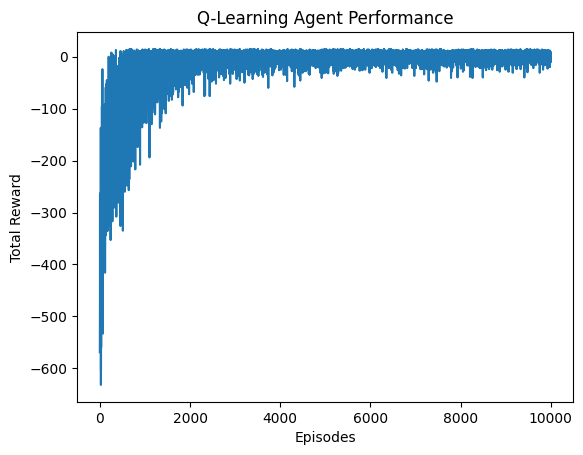

In [12]:
import numpy as np
import random
import gym
import matplotlib.pyplot as plt

# Initialize the Gym environment
env = gym.make("Taxi-v3")

# Initialize the Q-table
q_table = np.zeros([env.observation_space.n, env.action_space.n])

# Hyperparameters
alpha = 0.1
gamma = 0.6
epsilon = 0.1

# For plotting metrics
all_rewards = []

# Training the agent
for i in range(1, 10001):  # Reduced to 10,000 episodes
    state = env.reset()
    epochs, penalties, reward, total_reward = 0, 0, 0, 0
    done = False

    while not done:
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()  # Explore action space
        else:
            action = np.argmax(q_table[state])  # Exploit learned values

        next_state, reward, done, info = env.step(action)

        old_value = q_table[state, action]
        next_max = np.max(q_table[next_state])

        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        q_table[state, action] = new_value

        if reward == -10:
            penalties += 1

        total_reward += reward
        state = next_state
        epochs += 1

    all_rewards.append(total_reward)

    if i % 100 == 0:
        print(f"Episode: {i}")

print("Training finished.\n")

# Plotting
plt.plot(all_rewards)
plt.title('Q-Learning Agent Performance')
plt.xlabel('Episodes')
plt.ylabel('Total Reward')
plt.show()


# **3. Evaluating the Model**

In [13]:
# Assuming Q-table is already trained as shown in previous code

# Evaluate agent's performance after Q-learning
total_epochs, total_penalties = 0, 0
episodes = 100

for _ in range(episodes):
    state = env.reset()
    epochs, penalties, reward = 0, 0, 0
    done = False

    while not done:
        action = np.argmax(q_table[state])  # Choose action with highest Q-value for the current state
        state, reward, done, info = env.step(action)

        if reward == -10:
            penalties += 1

        epochs += 1

    total_penalties += penalties
    total_epochs += epochs

print(f"Results after {episodes} episodes:")
print(f"Average timesteps per episode: {total_epochs / episodes}")
print(f"Average penalties per episode: {total_penalties / episodes}")


Results after 100 episodes:
Average timesteps per episode: 23.83
Average penalties per episode: 0.0


# **4. Results and Visualization**

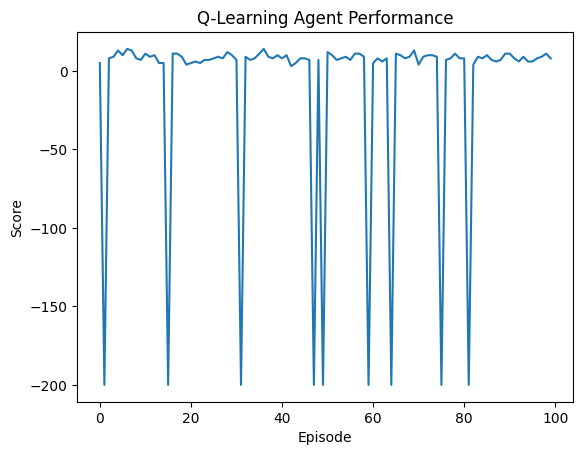

In [14]:
import matplotlib.pyplot as plt

# Assuming Q-table is already trained

# Evaluate agent's performance
total_scores = []
episodes = 100

for _ in range(episodes):
    state = env.reset()
    total_reward = 0
    done = False

    while not done:
        action = np.argmax(q_table[state])
        state, reward, done, info = env.step(action)
        total_reward += reward

    total_scores.append(total_reward)

# Plot the evaluation scores
plt.plot(total_scores)
plt.xlabel('Episode')
plt.ylabel('Score')
plt.title('Q-Learning Agent Performance')
plt.show()

env.close()
